### Tutorial: Pfam Protein Sequence Classification 1

In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import os

In [4]:
df = pd.read_csv("../../../datasets/dataset_pfam_seq_sd.csv")

In [5]:
df.shape

(1339083, 5)

In [6]:
df.head()

,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,GMC_oxred_C,A4WZS5_RHOS5/416-539,PF05199.13,PHPE.SRIRLST.RRDAHGMP.....IP.RIESRLGP............,PHPESRIRLSTRRDAHGMPIPRIESRLGPDAFARLRFMARTCRAIL...
1,DUF2887,K9QI92_9NOSO/3-203,PF11103.8,RDSIYYQIFKRFPALIFEL..VD.NRPPQAQNYRFESVEVKETAFR...,RDSIYYQIFKRFPALIFELVDNRPPQAQNYRFESVEVKETAFRIDG...
2,zf-IS66,Q92LC9_RHIME/32-75,PF13005.7,.TCCPDCGG.E..LRLVGED.AS....EILDMI.AAQMKVIEVARL...,TCCPDCGGELRLVGEDASEILDMIAAQMKVIEVARLKKSCRCCE
3,Asp_decarbox,X2GQZ4_9BACI/1-115,PF02261.16,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...
4,Filamin,A7SQM3_NEMVE/342-439,PF00630.19,TACPKQ.CTA....RGLG.............LK.AAPVT.QPT..R...,TACPKQCTARGLGLKAAPVTQPTRFVVILNDCHGQPLGRSEGELEV...


In [7]:
df.isna().sum()

family_id           0
sequence_name       0
family_accession    0
aligned_sequence    0
sequence            0
dtype: int64

In [8]:
df["family_id"].groupby(df["family_id"]).value_counts().nlargest(10)

family_id        family_id      
Methyltransf_25  Methyltransf_25    4545
LRR_1            LRR_1              2407
Acetyltransf_7   Acetyltransf_7     2199
His_kinase       His_kinase         1921
Bac_transf       Bac_transf         1908
Lum_binding      Lum_binding        1878
DNA_binding_1    DNA_binding_1      1681
Chromate_transp  Chromate_transp    1579
Lipase_GDSL_2    Lipase_GDSL_2      1564
DnaJ_CXXCXGXG    DnaJ_CXXCXGXG      1512
Name: family_id, dtype: int64

In [9]:
df["family_accession"].groupby(df["family_accession"]).value_counts().nlargest(10)

family_accession  family_accession
PF13649.6         PF13649.6           4545
PF00560.33        PF00560.33          2407
PF13508.7         PF13508.7           2199
PF06580.13        PF06580.13          1921
PF02397.16        PF02397.16          1908
PF00677.17        PF00677.17          1878
PF01035.20        PF01035.20          1681
PF02417.15        PF02417.15          1579
PF13472.6         PF13472.6           1564
PF00684.19        PF00684.19          1512
Name: family_accession, dtype: int64

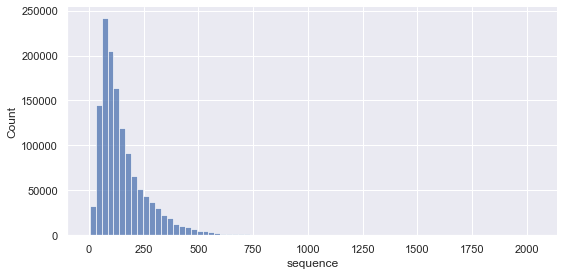

In [48]:
sns.displot(df["sequence"].apply(lambda x: len(x)), bins=75, height=4, aspect=2)

In [11]:
df["sequence"].str.len().mean()

155.15658103343856

In [12]:
df["sequence"].str.len().min()

4

In [13]:
df["sequence"].str.len().max()

2037

In [14]:
df["sequence"].str.len().median()

119.0

In [15]:
df_filt = df.groupby("family_accession").filter(lambda x: len(x) > 1200)

In [16]:
df_filt

,family_id,sequence_name,family_accession,aligned_sequence,sequence
8,His_kinase,Q47E94_DECAR/372-450,PF06580.13,SE.I..KLLHAQVNPHFLFNALNTL......S....AV...I.......,SEIKLLHAQVNPHFLFNALNTLSAVIRRDPEKACHLVLNLSTFFRK...
29,Bac_transf,D3EZT3_CONWI/319-507,PF02397.16,KRTFDLIG.SL.....LLLT.L.L.S...P.L.L...L....T......,KRTFDLIGSLLLLTLLSPLLLTLSLAVKLSSRGPVFYRSTRPGIGG...
57,WD40,O48679_ARATH/318-354,PF00400.32,MSVVGA..L....R.....GH....RKA.............I...M...,MSVVGALRGHRKAIMCLAVASDLVLSGSADKSLRVWR
103,Glycos_trans_3N,A0A068Y394_ECHMU/7-69,PF02885.17,SGILSKKANG....G..SLSSTEIDYYTKEL..AE.DN...........,SGILSKKANGGSLSSTEIDYYTKELAEDNVNIAQIGAFLMAVFTRG...
120,Chromate_transp,D5EXG9_PRER2/4-187,PF02417.15,VSLFITFFEIGLFGFGGGYGML.SLIQHET........VE.........,VSLFITFFEIGLFGFGGGYGMLSLIQHETVEAHHWLSTSEFTDIVA...
...,...,...,...,...,...
1338917,DHH,R7FC58_9FIRM/344-498,PF01368.20,QVFL.MGHRFGDLDSIGS.ACGLAG........................,QVFLMGHRFGDLDSIGSACGLAGAVRLMRKPAYVVVSRQSCLATQL...
1338932,HTH_1,Q98N95_RHILO/3-62,PF00126.27,LEALADFNLVAAHG.GFGRAGR.ISGR...SKATLSRHVNELEH.S...,LEALADFNLVAAHGGFGRAGRISGRSKATLSRHVNELEHSLGVRLI...
1338989,MutS_III,I0IH70_PHYMF/275-582,PF05192.18,ASLASLEV.VR................TQAAAGA...............,ASLASLEVVRTQAAAGASGETAGSLLGVLSGNGKATRTPMGGRLLR...
1339027,Chromate_transp,R5XL48_9FIRM/4-177,PF02417.15,LKLFLSFLQIGLFSFGGGYAAM.PFIRDQV........VV.........,LKLFLSFLQIGLFSFGGGYAAMPFIRDQVVVQNSWLSMQEFTDLIT...


In [17]:
df_bal = df_filt.groupby('family_accession').apply(lambda x: x.sample(1200))
df_bal.family_accession.value_counts()

PF06580.13    1200
PF01523.16    1200
PF02881.19    1200
PF01255.19    1200
PF02397.16    1200
PF00586.24    1200
PF00400.32    1200
PF02885.17    1200
PF01368.20    1200
PF02729.21    1200
PF00763.23    1200
PF01725.16    1200
PF00677.17    1200
PF13508.7     1200
PF02417.15    1200
PF02545.14    1200
PF05192.18    1200
PF01035.20    1200
PF01799.20    1200
PF01715.17    1200
PF00684.19    1200
PF00126.27    1200
PF13472.6     1200
PF00560.33    1200
PF03484.15    1200
PF03453.17    1200
PF00391.23    1200
PF13649.6     1200
Name: family_accession, dtype: int64

In [18]:
df_bal.head()

family_id       sequence_name family_accession  \
family_accession                                                          
PF00126.27       1163177     HTH_1  Q88J16_PSEPK/16-75       PF00126.27   
                 897198      HTH_1   A1W2J5_ACISJ/3-62       PF00126.27   
                 311700      HTH_1   A9CFQ6_AGRFC/4-63       PF00126.27   
                 1153531     HTH_1   Q93RT2_STRCO/8-67       PF00126.27   
                 817674      HTH_1  Q9KQQ1_VIBCH/18-77       PF00126.27   

                                                           aligned_sequence  \
family_accession                                                              
PF00126.27       1163177  YKHLVLIDTLARTR.NMHATAT.RMNL...SQPALSKMLRDLEE.Q...   
                 897198   LRDLRHFLAVAEEG.HIGRAAA.RLHL...SQPPLTRHIQALEE.K...   
                 311700   RQHLSILREVDRMG.SLTAAAE.RLNV...SQSALSHTIRKLED.R...   
                 1153531  LNLVVALRALLEER.NVTRAGQ.RVGL...SQPAMSAALARLRR.H...   
                 817674   LKRIVIFNKVVECG.SFTCAAE.ALGM...TKSKVSEQITALEK.T...   

                                                                   sequence  
family_accession                                                             
PF00126.27       1163177  YKHLVLIDTLARTRNMHATATRMNLSQPALSKMLRDLEEQFGFALF...  
                 897198   LRDLRHFLAVAEEGHIGRAAARLHLSQPPLTRHIQALEEKIGVPLF...  
                 311700   RQHLSILREVDRMGSLTAAAERLNVSQSALSHTIRKLEDRYGVAMW...  
                 1153531  LNLVVALRALLEERNVTRAGQRVGLSQPAMSAALARLRRHFDDDLL...  
                 817674   LKRIVIFNKVVECGSFTCAAEALGMTKSKVSEQITALEKTLNVRLL...

In [57]:
df_red = df_bal[["family_accession", "sequence"]].reset_index(drop=True)
df_red.head()

,family_accession,sequence
0,PF00126.27,YKHLVLIDTLARTRNMHATATRMNLSQPALSKMLRDLEEQFGFALF...
1,PF00126.27,LRDLRHFLAVAEEGHIGRAAARLHLSQPPLTRHIQALEEKIGVPLF...
2,PF00126.27,RQHLSILREVDRMGSLTAAAERLNVSQSALSHTIRKLEDRYGVAMW...
3,PF00126.27,LNLVVALRALLEERNVTRAGQRVGLSQPAMSAALARLRRHFDDDLL...
4,PF00126.27,LKRIVIFNKVVECGSFTCAAEALGMTKSKVSEQITALEKTLNVRLL...


In [20]:
num_classes = len(df_red.family_accession.value_counts())
num_classes

28

In [21]:
df_red.family_accession.value_counts()

PF06580.13    1200
PF01523.16    1200
PF02881.19    1200
PF01255.19    1200
PF02397.16    1200
PF00586.24    1200
PF00400.32    1200
PF02885.17    1200
PF01368.20    1200
PF02729.21    1200
PF00763.23    1200
PF01725.16    1200
PF00677.17    1200
PF13508.7     1200
PF02417.15    1200
PF02545.14    1200
PF05192.18    1200
PF01035.20    1200
PF01799.20    1200
PF01715.17    1200
PF00684.19    1200
PF00126.27    1200
PF13472.6     1200
PF00560.33    1200
PF03484.15    1200
PF03453.17    1200
PF00391.23    1200
PF13649.6     1200
Name: family_accession, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_red, test_size=0.25)
X_val, X_test = train_test_split(X_test, test_size=0.50)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(25200, 2)
(4200, 2)
(4200, 2)


In [24]:
aa_seq_dict = {'A': 1,'C': 2,'D': 3,'E': 4,'F': 5,'G': 6,'H': 7,'I': 8,'K': 9,'L': 10,'M': 11,'N': 12,'P': 13,'Q': 14,'R': 15,'S': 16,'T': 17,'V': 18,'W': 19,'Y': 20}

In [25]:
def aa_seq_encoder(data):
    full_sequence_list = []
    for i in data['sequence'].values:
        row_sequence_list = []
        for j in i:
            row_sequence_list.append(aa_seq_dict.get(j, 0))
        full_sequence_list.append(np.array(row_sequence_list))
    return full_sequence_list
  
X_train_encode = aa_seq_encoder(X_train) 
X_val_encode = aa_seq_encoder(X_val) 
X_test_encode = aa_seq_encoder(X_test) 

In [26]:
X_train_encode[0]

array([ 1,  3,  1,  1, 18, 18, 15, 10, 15, 13, 10,  4, 18,  6,  8, 13, 12,
       13,  9, 16,  1, 18,  1,  1, 17, 18,  3,  2, 12, 16, 15, 20, 18, 20,
       10,  3, 13, 20,  4,  6,  1,  9,  1, 18, 18,  1,  4,  1,  1, 15, 12,
       10, 16,  2, 18,  6,  1,  4, 13, 10,  1, 18, 17,  3, 12, 10, 12,  5,
        6, 16, 13,  4,  9, 13,  8,  6, 20, 19, 14, 10,  1, 16,  1,  2, 14,
        6,  8,  1,  4,  1,  2, 15,  8, 11,  4, 17, 13, 18, 17,  6,  6, 12,
       18, 16, 10, 20, 12,  4, 17, 10,  3,  1, 17,  6, 17, 13, 14, 13,  8,
       20, 13, 17, 13, 18,  8,  6, 11, 18,  6, 10,  8])

In [27]:
from keras.preprocessing.sequence import pad_sequences

max_length = 100

X_train_padded = pad_sequences(X_train_encode, maxlen=max_length, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_encode, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_encode, maxlen=max_length, padding='post', truncating='post')

In [78]:
X_train.sequence[1][:30]

'LRDLRHFLAVAEEGHIGRAAARLHLSQPPL'

In [80]:
X_train_encode[1][:30]

array([ 7, 10, 15, 18, 10,  3, 18, 16, 14, 17, 15,  5, 12, 10,  7, 16, 15,
       12, 12,  8, 18,  4, 14,  5, 17,  4,  2])

In [79]:
X_train_padded[1][:30]

array([ 7, 10, 15, 18, 10,  3, 18, 16, 14, 17, 15,  5, 12, 10,  7, 16, 15,
       12, 12,  8, 18,  4, 14,  5, 17,  4,  2,  0,  0,  0])

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_enc = le.fit_transform(X_train['family_accession'])
y_val_enc = le.transform(X_val['family_accession'])
y_test_enc = le.transform(X_test['family_accession'])


In [81]:
X_train['family_accession']

5190     PF00586.24
3971     PF00560.33
25388    PF03453.17
14023    PF01523.16
12758    PF01368.20
            ...    
24485    PF02885.17
11655    PF01255.19
13012    PF01368.20
18836    PF02397.16
15080    PF01715.17
Name: family_accession, Length: 25200, dtype: object

In [82]:
y_train_enc

array([ 4,  3, 21, ..., 10, 15, 12], dtype=int64)

In [85]:
num_classes = len(le.classes_)
num_classes

28

In [30]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train_enc)
y_val = to_categorical(y_val_enc)
y_test = to_categorical(y_test_enc)

In [31]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Input, Bidirectional, LSTM, Dropout
from keras.layers.embeddings import Embedding
from keras.regularizers import l2
from keras.models import Model

In [99]:
model = Sequential()

model.add(Embedding(21, 16, input_length=max_length, name="EmbeddingLayer"))
model.add(Bidirectional(LSTM(16), name="BidirectionalLayer"))
model.add(Dropout(0.2, name="DropoutLayer"))
model.add(Dense(28, activation='softmax', name="DenseLayer"))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
EmbeddingLayer (Embedding)   (None, 100, 16)           336       
_________________________________________________________________
BidirectionalLayer (Bidirect (None, 32)                4224      
_________________________________________________________________
DropoutLayer (Dropout)       (None, 32)                0         
_________________________________________________________________
DenseLayer (Dense)           (None, 28)                924       
Total params: 5,484
Trainable params: 5,484
Non-trainable params: 0
_________________________________________________________________


In [105]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [106]:
history = model.fit(
    X_train_padded, y_train,
    epochs=100, batch_size=256,
    validation_data=(X_val_padded, y_val),
    callbacks=[es]
    )

Epoch 1/100
99/99 [==============================] - 20s 175ms/step - loss: 2.0480 - accuracy: 0.3982 - val_loss: 0.2836 - val_accuracy: 0.9145
Epoch 2/100
99/99 [==============================] - 17s 168ms/step - loss: 0.2563 - accuracy: 0.9247 - val_loss: 0.1167 - val_accuracy: 0.9690
Epoch 3/100
99/99 [==============================] - 17s 169ms/step - loss: 0.1097 - accuracy: 0.9698 - val_loss: 0.0682 - val_accuracy: 0.9817
Epoch 4/100
99/99 [==============================] - 17s 169ms/step - loss: 0.0735 - accuracy: 0.9787 - val_loss: 0.0432 - val_accuracy: 0.9898
Epoch 5/100
99/99 [==============================] - 17s 171ms/step - loss: 0.0558 - accuracy: 0.9858 - val_loss: 0.0393 - val_accuracy: 0.9893
Epoch 6/100
99/99 [==============================] - 17s 172ms/step - loss: 0.0323 - accuracy: 0.9921 - val_loss: 0.0352 - val_accuracy: 0.9890
Epoch 7/100
99/99 [==============================] - 17s 171ms/step - loss: 0.0288 - accuracy: 0.9928 - val_loss: 0.0262 - val_accuracy:

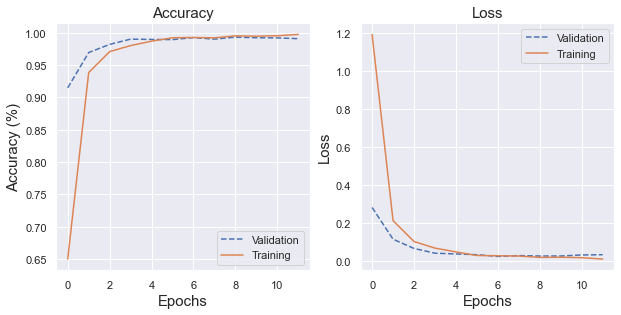

In [111]:
fig = plt.figure(figsize=(10,10))

# total_rows, total_columns, subplot_index(1st, 2nd, etc..)
plt.subplot(2, 2, 1)
plt.title("Accuracy", fontsize=15)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
plt.plot(history.history["val_accuracy"], label='Validation Accuracy', linestyle='dashed')
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.legend(["Validation", "Training"], loc="lower right")

plt.subplot(2, 2, 2)
plt.title("Loss", fontsize=15)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.plot(history.history["val_loss"], label='Validation loss', linestyle='dashed')
plt.plot(history.history["loss"], label='Training loss')
plt.legend(["Validation", "Training"], loc="upper right")

In [108]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_padded)

print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=le.classes_))

             precision    recall  f1-score   support

 PF00126.27       0.99      1.00      0.99       157
 PF00391.23       1.00      0.99      0.99       157
 PF00400.32       0.99      1.00      1.00       131
 PF00560.33       1.00      0.99      1.00       161
 PF00586.24       0.99      0.99      0.99       149
 PF00677.17       1.00      1.00      1.00       149
 PF00684.19       1.00      1.00      1.00       137
 PF00763.23       0.99      0.98      0.99       148
 PF01035.20       1.00      0.99      1.00       121
 PF01255.19       0.99      0.99      0.99       163
 PF01368.20       0.99      1.00      0.99       142
 PF01523.16       0.97      0.97      0.97       132
 PF01715.17       1.00      0.99      0.99       151
 PF01725.16       0.99      1.00      0.99       139
 PF01799.20       1.00      0.99      0.99       168
 PF02397.16       1.00      1.00      1.00       152
 PF02417.15       1.00      1.00      1.00       158
 PF02545.14       0.99      0.98      0.99   

In [109]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

<AxesSubplot:>

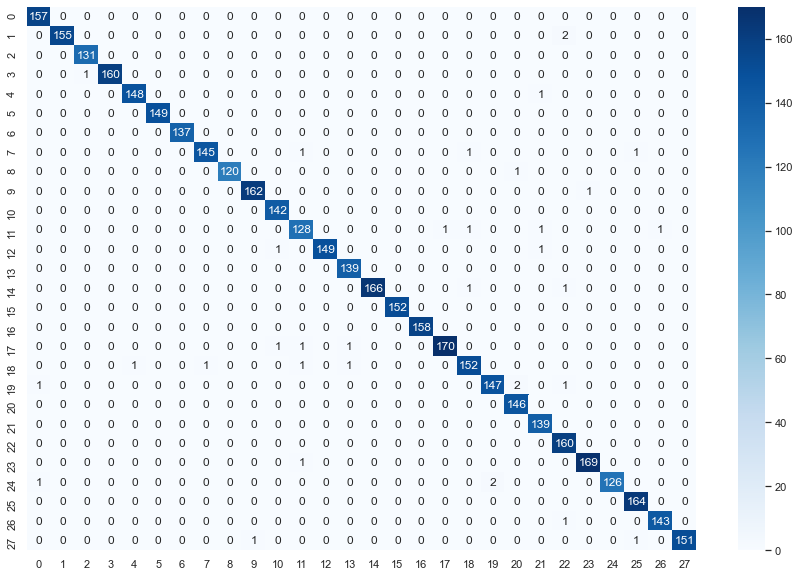

In [110]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')